# 03 — Modelagem Baseline (Logística e Árvore)

Objetivo: usar os features criados no `02_target_features.ipynb` para treinar e avaliar modelos simples.

- Carregar `ibov_features.parquet`
- Dividir dados em treino (tudo menos últimos 30 dias) e teste (últimos 30 dias)
- Treinar **Regressão Logística** e **Árvore de Decisão**
- Avaliar com **accuracy, classification report e matriz de confusão**


In [1]:
import pandas as pd, numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
# carregar features
root = Path('.').resolve()
in_path = root / 'data' / 'processed' / 'ibov_features.parquet'
df = pd.read_parquet(in_path)
print(df.shape)
df.head(3)

(3870, 25)


,ultimo,maxima,minima,abertura,vol,return_d1,var_pct,log_vol,close_lag1,return_lag1,...,return_lag5,close_lag10,return_lag10,return_acc_5,vol_5,return_acc_10,vol_10,return_acc_20,vol_20,target_next_day_up
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-03,67109.0,67347.0,66774.0,67163.0,1765000,-0.000804,-0.000804,14.383662,67163.0,0.008878,...,-0.006929,69909.0,0.007320,0.031088,1663960.0,-0.039851,1768320.0,-0.044364,1703680.0,0
2010-02-04,63934.0,67100.0,63750.0,67100.0,2262400,-0.047311,-0.047311,14.631937,67109.0,-0.000804,...,0.007961,68200.0,-0.024446,-0.024184,1786560.0,-0.062716,1795500.0,-0.098637,1704620.0,0
2010-02-05,62763.0,64001.0,61341.0,63934.0,3053000,-0.018316,-0.018316,14.931636,63934.0,-0.047311,...,-0.002836,66270.0,-0.028299,-0.039664,2032520.0,-0.052733,1874420.0,-0.113022,1779520.0,1


In [5]:
# separar X (features) e y (target)
y = df['target_next_day_up']
X = df.drop(columns=['target_next_day_up'])

In [6]:
# split temporal: treino = tudo menos últimos 30 dias, teste = últimos 30 dias
X_train, X_test = X.iloc[:-30], X.iloc[-30:]
y_train, y_test = y.iloc[:-30], y.iloc[-30:]

print(X_train.shape, X_test.shape)

(3840, 24) (30, 24)


In [10]:
# modelo 1 — Regressão Logística
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
acc_log = accuracy_score(y_test, y_pred_log)
print(f'Acurácia Regressão Logística (teste): {acc_log:.2%}')
print(classification_report(y_test, y_pred_log))

Acurácia Regressão Logística (teste): 40.00%
              precision    recall  f1-score   support

           0       0.36      0.27      0.31        15
           1       0.42      0.53      0.47        15

    accuracy                           0.40        30
   macro avg       0.39      0.40      0.39        30
weighted avg       0.39      0.40      0.39        30



c:\Users\mruther\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


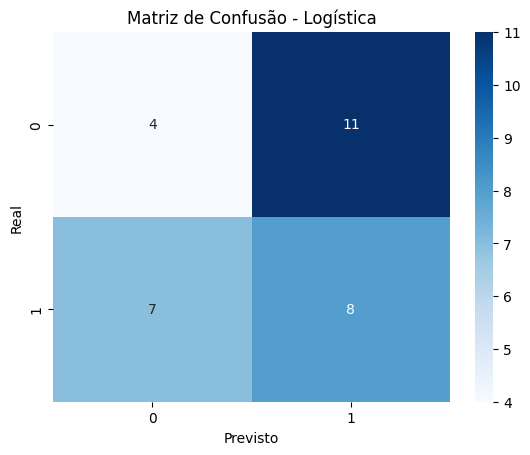

In [11]:
# matriz de confusão
cm_log = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - Logística')
plt.xlabel('Previsto'); plt.ylabel('Real')
plt.show()

In [12]:
# modelo 2 — Árvore de Decisão
tree = DecisionTreeClassifier(random_state=42, max_depth=5)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
acc_tree = accuracy_score(y_test, y_pred_tree)
print(f'Acurácia Árvore de Decisão (teste): {acc_tree:.2%}')
print(classification_report(y_test, y_pred_tree))

Acurácia Árvore de Decisão (teste): 46.67%
              precision    recall  f1-score   support

           0       0.43      0.20      0.27        15
           1       0.48      0.73      0.58        15

    accuracy                           0.47        30
   macro avg       0.45      0.47      0.43        30
weighted avg       0.45      0.47      0.43        30



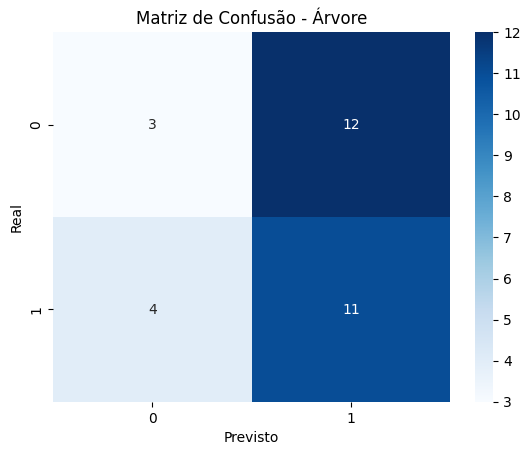

In [13]:
# matriz de confusão
cm_tree = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - Árvore')
plt.xlabel('Previsto'); plt.ylabel('Real')
plt.show()